<AxesSubplot:>

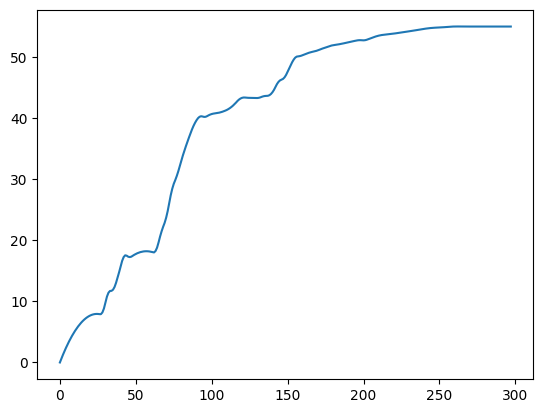

In [23]:
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('H-S_seq_1.csv')
df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace = True)
df_daily = df.resample('D').mean()

df_daily['H'].fillna(method='ffill', inplace = True)
# .interpolate()

t1 = df_daily.interpolate(method='polynomial', order = 2)
df = t1.reset_index()
df=df[['ds','y','H']]

df['y'].plot()

In [24]:
m = NeuralProphet()

m = m.add_future_regressor(name='H')
metrics = m.fit(df)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 303
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (19) is too small than the required number for the learning rate finder (214). The results mi

Finding best initial lr:   0%|          | 0/214 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [33]:
regressor_df = pd.DataFrame(data={'H':df['H']})

regressor_df

,H
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
293,4.464
294,4.464
295,4.464
296,4.464


In [31]:
future = m.make_future_dataframe(df = df,regressors_df = regressor_df, periods=10)

result = pd.concat([df,future], axis=0)
result

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,H
0,2021-08-06,0.000000,0.0
1,2021-08-07,0.638215,0.0
2,2021-08-08,1.249699,0.0
3,2021-08-09,1.834452,0.0
4,2021-08-10,2.392473,0.0
...,...,...,...
5,2022-06-05,NaN,0.0
6,2022-06-06,NaN,0.0
7,2022-06-07,NaN,0.0
8,2022-06-08,NaN,0.0


In [36]:
forecast = m.predict(result)

# m.set_plotting_backend('plotly')
plot = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.675% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.675% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 19it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
